In [29]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score, precision_recall_curve, auc, average_precision_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
import xlsxwriter
from random import randint
random_state = 7656
from preprocessing import stds, stats, cv_preprocessing
from load_data import load_data
import os
from scipy.stats import mode

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Multi Cat-Boost

In [2]:
pcls = ["q6.1_INTRU", "q6.2_DREAM", "q6.3_FLASH", "q6.4_UPSET",
               "q6.5_PHYS", "q6.6_AVTHT", "q6.7_AVSIT", "q6.8_AMNES", "q6.9_DISINT",
               "q6.10_DTACH", "q6.11_NUMB", "q6.12_FUTRE", "q6.13_SLEEP",
               "q6.14_ANGER", "q6.15_CONC", "q6.16_HYPER", "q6.17_STRTL"]
phqs = [f"T1q5.{i}" for i in range(1, 10)]
phqs2 = [f"T1q5.{i}_" for i in range(1, 10)]


In [3]:
target_feature

NameError: name 'target_feature' is not defined

In [4]:
df_preprocessed[target_feature]

NameError: name 'df_preprocessed' is not defined

In [16]:
features

['highschool_diploma',
 'ADHD',
 'T1Acc1t',
 'T1Acc1n',
 'T1bias',
 'phq1',
 'PCL1',
 'intrusion_PCL_T1',
 'T1mean1t',
 'T1mean1n',
 'PCL_Strict1',
 'ABV',
 'dyslexia',
 'trauma_history6_1',
 'terror_p1',
 'terror_i1',
 'mva_p1',
 'mva_i1',
 'violent1',
 'sexual1',
 'ID',
 'q6.1_INTRU',
 'q6.2_DREAM',
 'q6.3_FLASH',
 'q6.4_UPSET',
 'q6.5_PHYS',
 'q6.6_AVTHT',
 'q6.7_AVSIT',
 'q6.8_AMNES',
 'q6.9_DISINT',
 'q6.10_DTACH',
 'q6.11_NUMB',
 'q6.12_FUTRE',
 'q6.13_SLEEP',
 'q6.14_ANGER',
 'q6.15_CONC',
 'q6.16_HYPER',
 'q6.17_STRTL',
 'intrusion_score',
 'intrusion_mean',
 'intrusion_std',
 'binary_intrusion',
 'tred_score',
 'tred_mean',
 'tred_std',
 'binary_tred',
 'avoidance_score',
 'avoidance_mean',
 'avoidance_std',
 'binary_avoidance',
 'hyper_score',
 'hyper_mean',
 'hyper_std',
 'binary_hyper',
 'T1q5.1',
 'T1q5.2',
 'T1q5.3',
 'T1q5.4',
 'T1q5.5',
 'T1q5.6',
 'T1q5.7',
 'T1q5.8',
 'T1q5.9',
 'phq_physical_score',
 'binary_phq_physical',
 'phq_feels_score',
 'binary_phq_feels',
 'p

average_precision_score = 0.14426082714597027
pr_auc = 0.3333920101090943


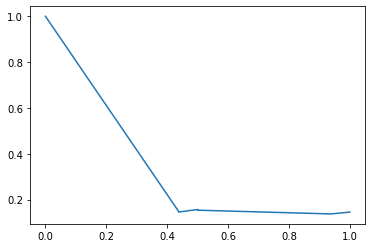

holdout i = , roc_auc = 0.505859375


NameError: name 'printd' is not defined

In [27]:
features2 = ['highschool_diploma',
 'ADHD',
 'T1Acc1t',
 'T1Acc1n',
 'T1bias',
 'phq1',
 'PCL1',
 'T1mean1t',
 'T1mean1n',
 'ABV',
 'dyslexia',
 'trauma_history6_1',
 'intrusion_score',
 'avoidance_score',
 'hyper_score',
 'T1q5.1',
 'T1q5.2',
 'T1q5.3',
 'T1q5.4',
 'T1q5.5',
 'T1q5.6',
 'T1q5.7',
 'T1q5.8',
 'T1q5.9',
 'phq_physical_score',
 'binary_phq_physical',
 'phq_feels_score',
 'binary_phq_feels',
 'phq_an_score',
 'binary_phq_an',
 'phq_func_score',
 'binary_phq_func',
 'phq_score',
 'phq_mean',
 'phq_std',
 'binary_phq']
df_preprocessed, features, target_feature = load_data()
df_preprocessed[phqs2] = 0
df_preprocessed[phqs2] = df_preprocessed[phqs] + 1
df_preprocessed['blop1'] = mode(df_preprocessed[phqs2+pcls], axis=1)[0] > 1
df_preprocessed['blop2'] = mode(df_preprocessed[pcls], axis=1)[0]
df_preprocessed['blop3'] = mode(df_preprocessed[phqs2], axis=1)[0]
#features2.extend(['blop1', 'blop2', 'blop3'])
features.extend(['blop1', 'blop2', 'blop3'])
df_preprocessed = df_preprocessed[(df_preprocessed['intrusion_PCL_T1']==0)]
#features2 = [i for i in features if i not in phqs+pcls]


for j in range(1):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])


    cv = StratifiedKFold(3)

    for train, test in cv.split(X, Y):
        
        x_train, y_train = X.iloc[train], Y.iloc[train]
        x_test, y_test = X.iloc[test], Y.iloc[test]
        x_test["ID"]
        x_train, x_test = cv_preprocessing(x_train, x_test)
        x_test["ID"]
        x_train['blop4'] = x_train[[i for i in x_train.columns if 'cogni_outlier_' in i]].sum(axis=1)
        x_test['blop4'] = x_test[[i for i in x_test.columns if 'cogni_outlier_' in i]].sum(axis=1)
        x_test["ID"]
        x_train['blop5'] = x_train[[i for i in x_train.columns if 'phq9_outlier_' in i]].sum(axis=1)
        x_test['blop5'] = x_test[[i for i in x_test.columns if 'phq9_outlier_' in i]].sum(axis=1)
        features.extend(['blop4', 'blop5'])
        x_train2 = x_train[feats]
        x_test2 = x_test[feats]
        x_test["ID"]
        #rfe = RFE(RandomForestClassifier(), n_features_to_select=30)
        model = XGBClassifier(verbose=0, class_weights=[1,1])
#         x_train = rfe.fit_transform(x_train,y_train)
#         x_test = rfe.transform(x_test)
        model.fit(x_train2,y_train)
        
        y_pred = model.predict_proba(x_test2)[:,1]


        #print(f1_score(y_test.astype(int), y_pred))
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = , roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")
        printd('f')

In [26]:
feats = ['T1mean1n', 'T1bias', 'ABV']#, 'T1mean1t', 'phq_std', 'PCL1']

In [ ]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [28]:
print(y_pred.argmax())
x_test.iloc[y_pred.argmax()]["ID"]

4


2370.0

In [ ]:
x_test.iloc[y_pred.argmax()][0:20]

In [ ]:
features

average_precision_score = 0.7960591102302332
pr_auc = 0.7878251761607378


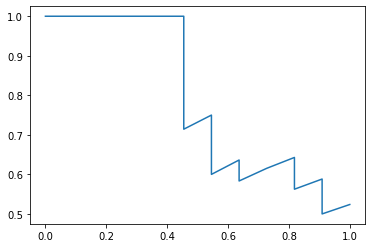

holdout i = , roc_auc = 0.7692307692307693


NameError: name 'printd' is not defined

In [30]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed[phqs2] = 0
df_preprocessed[phqs2] = df_preprocessed[phqs] + 1
df_preprocessed['blop1'] = mode(df_preprocessed[phqs2+pcls], axis=1)[0] > 1
df_preprocessed['blop2'] = mode(df_preprocessed[pcls], axis=1)[0]
df_preprocessed['blop3'] = mode(df_preprocessed[phqs2], axis=1)[0]
features.extend(['blop1', 'blop2'])
df_preprocessed = df_preprocessed[df_preprocessed['intrusion_PCL_T1']==1]
#features2 = [i for i in features if i not in phqs+pcls]


for j in range(1):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])


    cv = StratifiedKFold(5)

    for train, test in cv.split(X, Y):
        
        x_train, y_train = X.iloc[train], Y.iloc[train]
        x_test, y_test = X.iloc[test], Y.iloc[test]
             
        x_train, x_test = cv_preprocessing(x_train, x_test)
        x_train['blop3'] = x_train[[i for i in x_train.columns if 'outlier' in i]].sum(axis=1)
        x_test['blop3'] = x_test[[i for i in x_test.columns if 'outlier' in i]].sum(axis=1)


        rfe = RFE(RandomForestClassifier(), n_features_to_select=30)
        model = XGBClassifier(verbose=0)
#         x_train = rfe.fit_transform(x_train,y_train)
#         x_test = rfe.transform(x_test)
        model.fit(x_train,y_train)
        
        y_pred = model.predict_proba(x_test)[:,1]


        #print(f1_score(y_test.astype(int), y_pred))
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = , roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")
        printd('f')

In [ ]:
df_preprocessed[df_preprocessed['intrusion_PCL_T1']==1]['ID'].isin(df_preprocessed['target_binary_intrusion'])

In [7]:
df_preprocessed[(df_preprocessed['target_binary_intrusion']==1)]

,highschool_diploma,ADHD,T1Acc1t,T1Acc1n,T1bias,phq1,PCL1,intrusion_PCL_T1,T1mean1t,T1mean1n,...,T1q5.3_,T1q5.4_,T1q5.5_,T1q5.6_,T1q5.7_,T1q5.8_,T1q5.9_,blop1,blop2,blop3
6,1.0,0.0,0.9737,0.9737,-1.41,2.0,26.0,0.0,480.900000,479.486111,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,False,1.0,1.0
9,1.0,0.0,0.8947,0.8816,25.02,7.0,27.0,1.0,397.681818,422.696970,...,1.0,3.0,3.0,1.0,2.0,2.0,1.0,False,1.0,1.0
10,1.0,0.0,1.0000,0.9737,-12.74,5.0,21.0,0.0,477.821918,465.084507,...,1.0,2.0,1.0,1.0,2.0,1.0,2.0,False,1.0,2.0
21,1.0,0.0,0.9868,1.0000,-2.56,9.0,23.0,0.0,550.136986,547.575343,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,False,1.0,2.0
25,1.0,0.0,0.9605,0.9868,-0.21,11.0,35.0,1.0,448.657143,448.452055,...,3.0,2.0,3.0,1.0,2.0,1.0,2.0,True,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,1.0,1.0,0.9868,0.9737,3.28,7.0,30.0,1.0,479.800000,483.083333,...,1.0,3.0,2.0,2.0,1.0,1.0,2.0,True,1.0,2.0
810,1.0,0.0,0.9605,0.9868,-2.65,7.0,28.0,0.0,567.450704,564.802817,...,1.0,2.0,1.0,1.0,1.0,2.0,3.0,False,1.0,1.0
817,1.0,0.0,0.9737,1.0000,28.93,4.0,19.0,0.0,544.056338,572.985916,...,1.0,3.0,2.0,2.0,1.0,1.0,1.0,False,1.0,1.0
818,0.0,1.0,1.0000,1.0000,24.10,13.0,62.0,1.0,483.971831,508.069444,...,2.0,4.0,4.0,2.0,2.0,3.0,1.0,True,4.0,2.0


In [16]:
a = x_train[[i for i in x_train.columns if 'outlier' in i]].sum(axis=1)

In [17]:
b = y_train

In [18]:
df = pd.DataFrame()

In [24]:
df['a'] = y_train
df['b'] = a

In [38]:
a.iloc[np.where(1-y_train)].mean()

14.007017543859648

In [34]:
a.iloc[np.where(y_train)].mean()

8.487804878048781

In [32]:
np.vstack([y_train, a])

array([[  1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   0.,   1.,   0., 

In [25]:
df

,a,b
0,NaN,16
1,NaN,2
2,NaN,16
3,NaN,2
4,NaN,16
...,...,...
362,NaN,16
363,1.0,16
364,NaN,16
365,1.0,0


In [8]:
df_preprocessed[(df_preprocessed['PCL_Strict1']>0)]

,highschool_diploma,ADHD,T1Acc1t,T1Acc1n,T1bias,phq1,PCL1,intrusion_PCL_T1,T1mean1t,T1mean1n,...,T1q5.3_,T1q5.4_,T1q5.5_,T1q5.6_,T1q5.7_,T1q5.8_,T1q5.9_,blop1,blop2,blop3
41,1.0,0.0,1.0000,0.9868,4.28,17.0,58.0,1.0,521.068493,525.347222,...,3.0,3.0,4.0,1.0,3.0,2.0,3.0,True,3.0,3.0
115,0.0,1.0,0.9605,0.9868,-0.86,18.0,53.0,1.0,425.942029,425.083333,...,1.0,4.0,4.0,4.0,3.0,2.0,2.0,True,4.0,4.0
178,1.0,0.0,1.0000,0.9868,-1.05,12.0,53.0,1.0,526.306667,525.260274,...,4.0,4.0,4.0,1.0,1.0,2.0,1.0,True,4.0,1.0
220,1.0,0.0,0.9737,0.9605,-7.52,18.0,56.0,1.0,NaN,NaN,...,4.0,4.0,3.0,3.0,3.0,2.0,3.0,True,4.0,3.0
285,1.0,1.0,1.0000,1.0000,6.10,21.0,54.0,1.0,495.380282,501.478873,...,4.0,4.0,4.0,4.0,2.0,4.0,4.0,True,5.0,4.0
355,0.0,1.0,1.0000,1.0000,-17.06,18.0,55.0,1.0,540.445946,523.388889,...,2.0,4.0,3.0,2.0,3.0,2.0,4.0,True,4.0,2.0
481,1.0,0.0,1.0000,1.0000,4.20,26.0,67.0,1.0,436.056338,440.260274,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,True,5.0,4.0
818,0.0,1.0,1.0000,1.0000,24.10,13.0,62.0,1.0,483.971831,508.069444,...,2.0,4.0,4.0,2.0,2.0,3.0,1.0,True,4.0,2.0
825,1.0,0.0,0.9737,1.0000,19.05,18.0,60.0,1.0,566.802817,585.849315,...,3.0,1.0,3.0,4.0,1.0,4.0,4.0,True,5.0,4.0


In [39]:
x_test.iloc[88][00:60]

highschool_diploma    1.000000e+00
ADHD                  1.000000e+00
T1Acc1t               9.868000e-01
T1Acc1n               9.868000e-01
T1bias               -2.185000e+01
phq1                  1.100000e+01
PCL1                  3.600000e+01
intrusion_PCL_T1      1.000000e+00
T1mean1t              5.104306e+02
T1mean1n              4.885811e+02
PCL_Strict1          -1.355259e-16
ABV                   4.524892e-02
dyslexia             -8.712377e-17
trauma_history6_1    -1.403661e-16
terror_p1            -1.113248e-16
terror_i1             0.000000e+00
mva_p1               -1.016444e-16
mva_i1               -1.452063e-17
violent1              8.470366e-18
sexual1               9.680419e-18
q6.1_INTRU            3.000000e+00
q6.2_DREAM            1.000000e+00
q6.3_FLASH            2.000000e+00
q6.4_UPSET            2.000000e+00
q6.5_PHYS             1.000000e+00
q6.6_AVTHT            1.000000e+00
q6.7_AVSIT            1.000000e+00
q6.8_AMNES            1.000000e+00
q6.9_DISINT         

<AxesSubplot:>

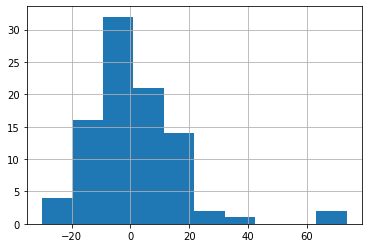

In [10]:
x_test2[ 'T1bias'].hist()

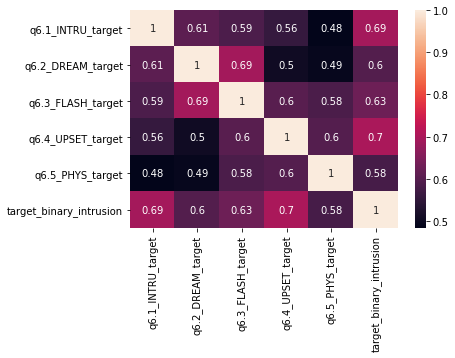

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_preprocessed[[i for i in secondary_targets.keys()]+['target_binary_intrusion']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
x_test2[(model.predict(x_test) == 0) & (y_test.astype(int) == 1 )][features]

In [16]:
x_test2[(model.predict(x_test) == 1) & (y_test.astype(int) == 0 )][features]

,highschool_diploma,ADHD,T1Acc1t,T1Acc1n,T1bias,phq1,trait1,state1,PCL1,intrusion_PCL_T1,...,phq_feels_score,binary_phq_feels,phq_an_score,binary_phq_an,phq_func_score,binary_phq_func,phq_score,phq_mean,phq_std,binary_phq
603,0.0,0.0,0.9737,1.0000,19.34,10.0,37.0,26.0,36.0,0.0,...,2.0,0.0,3.0,1.0,2.0,1.0,10.0,1.111111,1.054093,1.0
115,0.0,1.0,0.9605,0.9868,-0.86,18.0,35.0,60.0,53.0,1.0,...,6.0,1.0,5.0,1.0,4.0,1.0,18.0,2.000000,1.118034,1.0
406,1.0,0.0,0.9868,0.9737,-15.42,3.0,24.0,20.0,17.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.333333,0.500000,0.0
69,1.0,0.0,1.0000,1.0000,-14.07,9.0,41.0,42.0,28.0,0.0,...,1.0,0.0,3.0,1.0,2.0,0.0,9.0,1.000000,0.707107,0.0
682,1.0,0.0,0.9605,1.0000,-28.75,3.0,35.0,36.0,24.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.333333,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1.0,0.0,0.9474,0.9868,15.32,5.0,24.0,24.0,20.0,0.0,...,0.0,0.0,4.0,1.0,3.0,1.0,5.0,0.555556,1.013794,0.0
122,1.0,1.0,0.9868,0.9868,-21.85,11.0,40.0,36.0,36.0,1.0,...,3.0,1.0,3.0,1.0,3.0,1.0,11.0,1.222222,0.666667,1.0
484,0.0,1.0,1.0000,0.9868,-2.63,3.0,33.0,26.0,27.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.333333,0.500000,0.0
582,0.0,0.0,0.9868,0.9868,-19.20,7.0,44.0,45.0,22.0,0.0,...,4.0,1.0,2.0,0.0,1.0,0.0,7.0,0.777778,0.971825,0.0


In [51]:
x_test2[(model.predict(x_test) != y_test.astype(int))].shape

(27, 39)

In [52]:
x_test2[(model.predict(x_test) != y_test.astype(int))].shape

(27, 39)

In [53]:
precision_score(y_test.astype(int), y_pred)

0.37037037037037035

In [54]:
y_test.astype(int).sum()

20

In [55]:
y_pred.sum()

27.0